In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from numpy.linalg import solve
from scipy.integrate import quad
import math

In [2]:
shape_pts = np.array([[-8,1],[-6,10],[-5,-7],[0,-5],[1,9],[2,-8],[3,28],[5,-23],[7,12],[9,1],[10,10],[12,15],[14,18],[15,10]])

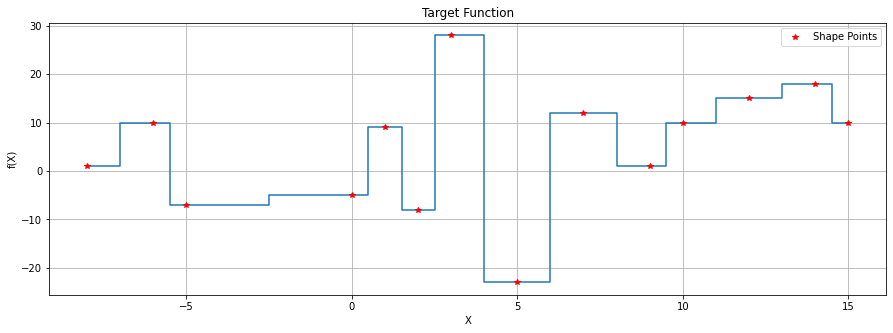

In [3]:
'''Generate the target function f'''

%matplotlib inline
def TargetFunction(lst):
    x = []
    y = []
    for i in range(len(lst)):
        x.append(lst[i][0])
        y.append(lst[i][1])
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(5)
    plt.step(x,y,where = 'mid')
    plt.step(x,y,'r*',where = 'mid', label = 'Shape Points')
    plt.legend(['Shape Points'])
    plt.xlabel('X')
    plt.ylabel('f(X)')
    plt.title('Target Function')
    plt.grid()
    plt.legend(loc ="upper right")
    return plt


f = TargetFunction(shape_pts)




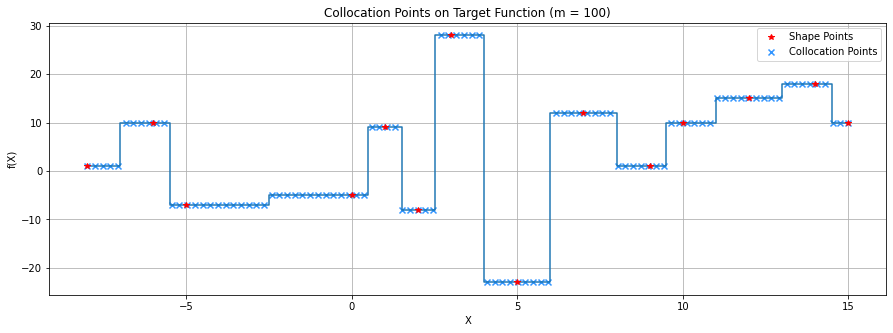

In [4]:
'''Collocation abscissa points'''


x_min = shape_pts[0][0]
x_max = shape_pts[-1][0]
m = 100
assert m >= len(shape_pts)

x = []
y = []
for i in range(len(shape_pts)):
    x.append(shape_pts[i][0])
    y.append(shape_pts[i][1])

u = interpolate.interp1d(x, y, kind='nearest',fill_value='array-like')
x_tilde_pts = np.linspace(x_min, x_max, m)

y_new = u(x_tilde_pts)


y_new = u(x_tilde_pts)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.step(x,y,where = 'mid')
plt.step(x,y,'r*',where = 'mid', label = 'Shape Points')
plt.grid()
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('Collocation Points on Target Function (m = '+str(m)+')')
plt.scatter(x_tilde_pts,y_new,c='#3396FF',marker='x',label='Collocation Points')
plt.legend()
plt.show()


# print(len(x_tilde_pts))


In [5]:
shape_pts = np.array([[-8,1],
                      [-6,10],
                      [-5,-7],
                      [0,-5],
                      [1,9],
                      [2,-8],
                      [3,28],
                      [5,-23],
                      [7,12],
                      [9,1],
                      [10,10],
                      [12,15],
                      [14,18],
                      [15,10]])

m = 100
x_min = shape_pts[0][0]
x_max = shape_pts[-1][0]
x_tilde_pts = np.linspace(x_min, x_max, m)



wavelength = x_max - x_min
kappa = 2*np.pi/wavelength

N = 22 # number of pairs of sine/cosine  


# print(len(x_tilde_pts))


#### Here the A matrix is generateded using collocation points

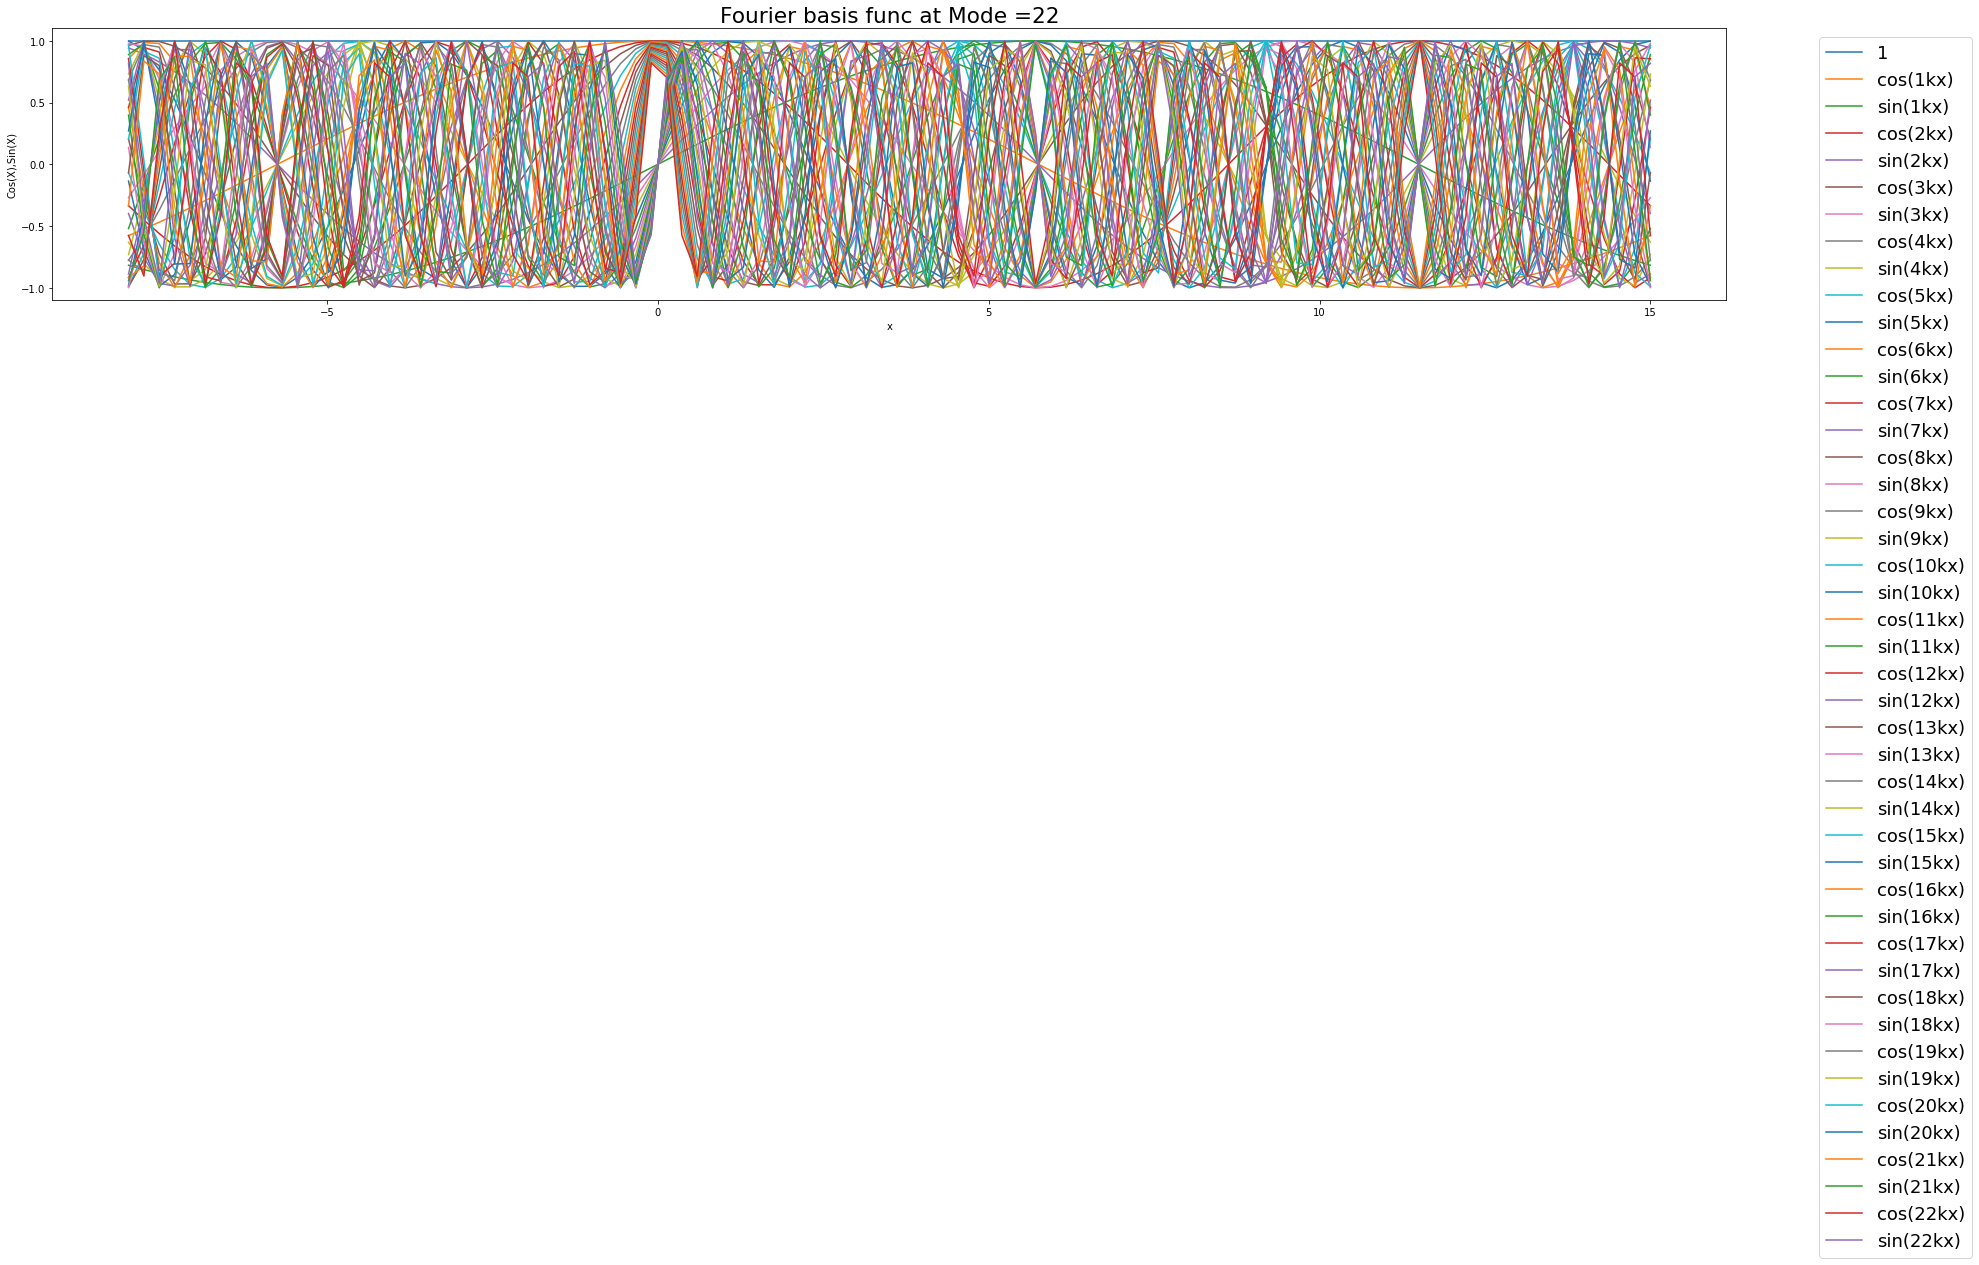

[[ 1.         -0.57668032 -0.81696989 ... -0.94226092 -0.57668032
   0.81696989]
 [ 1.         -0.52370385 -0.85190039 ... -0.54758631 -0.90469777
  -0.42605392]
 [ 1.         -0.4686186  -0.88340059 ...  0.68406419  0.26248208
  -0.96493687]
 ...
 [ 1.         -0.67546304 -0.73739384 ...  0.99096563  0.8213224
  -0.57046429]
 [ 1.         -0.62733471 -0.77874974 ...  0.10329345  0.7044188
   0.70978459]
 [ 1.         -0.57668032 -0.81696989 ... -0.94226092 -0.57668032
   0.81696989]]


In [6]:
'''Build the basis function evaluation matrix and target function vector at the collocation points'''
wavelength = x_tilde_pts[-1] - x_tilde_pts[0]
Kappa=2*(np.pi)/wavelength
N=22

# FourierBasis Function
def FourierBasis(x_tilde_pts):
    A=np.zeros((len(x_tilde_pts),2*N+1))
    for i in range (len(x_tilde_pts)):
        for j in range((2*N+1)):
            if (j==0):
                A[i,j]=1
            elif (j%2)==1:
                A[i,j]=np.cos(((j//2)+1)*Kappa*x_tilde_pts[i])
            elif (j%2)==0:
                A[i,j]=np.sin((j//2)*Kappa*x_tilde_pts[i])
    return np.array(A)

#Plot Function
def Plot_fourierbasis(function,x_pts):
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(5)
    for i in range(len(function[0])):
        if i==0:
            plt.plot(x_pts,function[:,0],label='1')
        elif i%2==1:
            plt.plot(x_pts,function[:,i], label='cos(%ikx)'%(((i/2)+0.5)))
        elif i%2==0 and i!=0:
            plt.plot(x_pts,function[:,i], label='sin(%ikx)'%(i/2))
        for j in range(len(function[0])//2):
            plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.xlabel('x'); plt.ylabel('Cos(X),Sin(X)')
        plt.title('Fourier basis func at Mode =' + str(N))
        plt.rcParams.update({'font.size': 18})
    return plt.show()
    
A = FourierBasis(x_tilde_pts)
Plot_fourierbasis(A,x_tilde_pts)
print(A)
# print(len(x_tilde_pts))


sin_function = []
for i in range(1,N):
    sine_function = [np.sin(kappa*i*x_tilde_pts),np.cos(kappa*i*x_tilde_pts)]
    sin_function.append(sine_function)

ones = np.ones(len(x_tilde_pts))

A = []

A.append(ones.tolist())



In [7]:
'''Compute optimal coefficient vector'''
rank = np.linalg.matrix_rank(A)

if A.shape[0] > A.shape[1]:
    print('A is overdetermined.')
elif A.shape[0] < A.shape[1]:
    print('A is underdetermined.')  
else:
    print('A is determined.')

if np.linalg.matrix_rank(A) == min(A.shape):
    print('A is full rank.')
else:
    print('A is rank deficient.')

#--------------------------------------------------------------#

f_tilde_vec = np.array(y_new)

if np.linalg.matrix_rank(A) == min(A.shape):
    print('A is full rank; solve for least squares.')
    c_tilde_star_vec = solve(A.transpose()@A, A.transpose()@f_tilde_vec)
else:
    print('A is rank deficient; solve for shortest least squares')
    c_tilde_star_vec = universal_solve(A.transpose()@A, A.transpose()@f_tilde_vec,
                                       pivot_tol=1e-6)
    
print('')
print('c_tilde_star_vec:\n')
for j,c in enumerate(c_tilde_star_vec):
    if j == 0:
        print('a_%2i = %10.3e'%(j,c))
    elif j%2 == 0:
        k = j/2
        print('b_%2i = %10.3e'%(k,c))
    else:
        k = (j+1)/2
        print('a_%2i = %10.3e'%(k,c))
        
print('')        
print('||r^*||_2 = %10.3e'%(np.linalg.norm(A@c_tilde_star_vec-f_tilde_vec)))


# print(len(x_tilde_pts))


A is overdetermined.
A is full rank.
A is full rank; solve for least squares.

c_tilde_star_vec:

a_ 0 =  2.995e+00
a_ 1 = -7.575e+00
b_ 1 = -6.312e-01
a_ 2 =  4.607e+00
b_ 2 =  4.775e+00
a_ 3 =  7.673e-01
b_ 3 =  2.747e+00
a_ 4 = -3.073e+00
b_ 4 =  2.792e+00
a_ 5 = -4.417e+00
b_ 5 = -4.838e+00
a_ 6 =  2.143e+00
b_ 6 = -4.502e+00
a_ 7 =  6.361e+00
b_ 7 =  3.717e+00
a_ 8 =  1.203e+00
b_ 8 =  3.211e+00
a_ 9 = -3.208e+00
b_ 9 =  2.343e+00
a_10 = -2.200e+00
b_10 =  2.489e+00
a_11 = -1.851e+00
b_11 = -3.811e-01
a_12 = -1.518e+00
b_12 = -1.674e+00
a_13 = -6.399e-01
b_13 = -1.810e+00
a_14 =  1.061e+00
b_14 = -3.288e-01
a_15 = -4.939e-02
b_15 =  9.671e-01
a_16 = -1.003e+00
b_16 = -2.686e-01
a_17 = -6.384e-01
b_17 = -1.581e+00
a_18 =  1.127e+00
b_18 = -7.673e-01
a_19 =  6.805e-01
b_19 =  1.526e+00
a_20 = -7.413e-01
b_20 =  2.983e-01
a_21 = -3.826e-01
b_21 = -7.579e-01
a_22 = -8.089e-01
b_22 = -5.050e-01

||r^*||_2 =  3.578e+01


In [8]:
'''Build the best approximant function'''

points_n = max(2*m, 200)
def bestg_vec_func(x_tilde_pts):
    matrics_a = FourierBasis(x_tilde_pts)
    return matrics_a@c_tilde_star_vec

x_tilde_pts_new = np.linspace(x_min, x_max, points_n)
bestg_vec_1 = bestg_vec_func(x_tilde_pts_new)


# print(len(x_tilde_pts))
# print(len(x_tilde_pts_new))

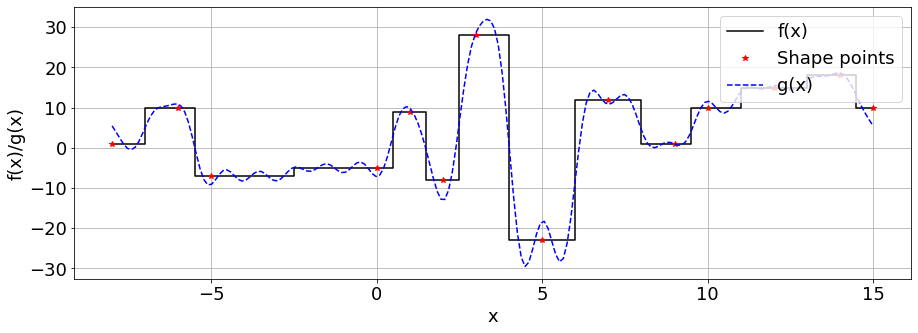

In [9]:
'''Plot comparison of f and g_best_vec'''


f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.step(shape_pts[:,0], shape_pts[:,1], where='mid',label='f(x)', color='k')
plt.plot(shape_pts[:,0], shape_pts[:,1], '*', color='red',label='Shape points')
plt.grid()
plt.plot(x_tilde_pts_new,bestg_vec_1,'--',label='g(x)', color='b')
plt.legend( loc='upper right')
plt.xlabel('x')
plt.ylabel("f(x)/g(x)")
plt.show()


# print(len(x_tilde_pts))


In [25]:
'''L2 norm error'''
def f_integrand(x):
    return u(x)**2
f_integral = quad(f_integrand, x_min, x_max, limit=1000)
f_l2=np.sqrt(f_integral)

print(f_l2[0])
print('||f||_L2 =%10.6f'%f_l2[0])
print('quadrature error =%10.6e'%f_l2[1])

def g2_integrand(x):
    g_vec = bestg_vec_func(np.array([x]))
    print(g_vec)
    return g_vec**2

print('')

g2_integral, error = quad(g2_integrand, x_min, x_max, limit=1000)
print('||g||_L2 =', math.sqrt(g2_integral))
print('quadrature error =', error)

def f_minus_g_2_integrand(x):
    f_x = u(np.array([x]))
    g_vec = bestg_vec_func(np.array([x]))
    return (f_x-g_vec)**2

print('')

f_minus_g_2_integral, error = quad(f_minus_g_2_integrand, x_min, x_max, limit=1000)
print('||f-g||_L2 =', math.sqrt(f_minus_g_2_integral))
print('quadrature error =', error)
r_err=(math.sqrt(f_minus_g_2_integral)/np.sqrt(f_integral)*100)
print('')
print('Relative error = %10.6f'%r_err[0],'%')


# print(len(x_tilde_pts))


64.63358258145173
||f||_L2 = 64.633583
quadrature error =3.142109e-03

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

Positives at collocation pts =  54
Negatives at collocation pts =  46
Positives =  267
Negatives =  233


/tmp/ipykernel_171614/180439857.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_tilde_pts, u(x_tilde_pts)-bestg_vec_func(x_tilde_pts),'bx',label='collocation pts',color='red')


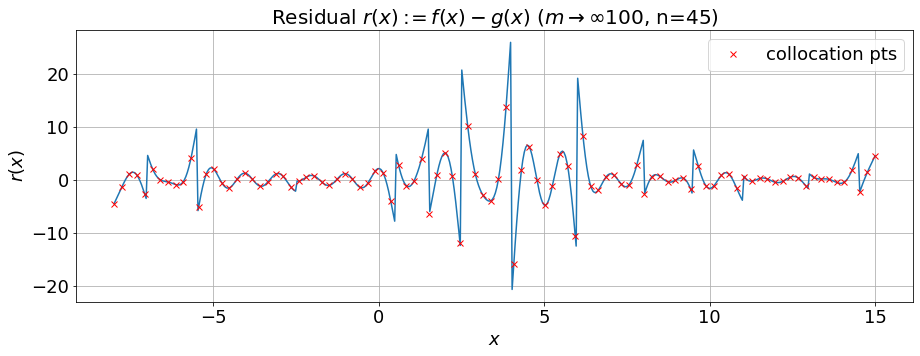

In [11]:
'''Residual of the best approximant'''

points_n = max(3*m, 500)
x_tilde_pts_new = np.linspace(x_min, x_max, points_n)

residual = u(x_tilde_pts_new) - bestg_vec_func(x_tilde_pts_new)
residual_collocation_pts = u(x_tilde_pts) - bestg_vec_func(x_tilde_pts)
print('Positives at collocation pts = ', tuple([True for p in residual_collocation_pts if p>0]).count(True))
print('Negatives at collocation pts = ', tuple([True for p in residual_collocation_pts if p<0]).count(True))
print('Positives = ', tuple([True for p in residual if p>0]).count(True))
print('Negatives = ', tuple([True for p in residual if p<0]).count(True))
  
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(x_tilde_pts_new, residual)
plt.plot(x_tilde_pts, u(x_tilde_pts)-bestg_vec_func(x_tilde_pts),'bx',label='collocation pts',color='red')
plt.title(r'Residual $r(x) :\!\!= f(x) - g(x)$ ($m\rightarrow\infty$'+str(m)+', n='+str(len(A[0]))+')', fontsize=20)

plt.ylabel(r'$r(x)$')
plt.xlabel(r'$x$')

plt.legend(loc='best')
plt.grid(True)
plt.show()


# print(len(x_tilde_pts))
# print(len(x_tilde_pts_new))

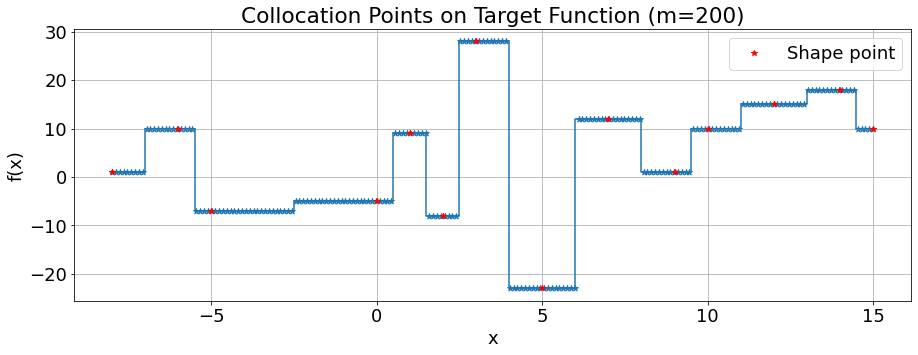

In [12]:
'''Collocation abscissa points'''

m=200
x_tilde_pts = np.linspace(x_min,x_max,m)
u = interpolate.interp1d(shape_pts[:,0], shape_pts[:,1], kind='nearest')
y_new= u(x_tilde_pts)

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.scatter(x_tilde_pts,y_new, marker = '*')
plt.step(shape_pts[:,0], shape_pts[:,1], where='mid')
plt.plot(shape_pts[:,0], shape_pts[:,1], '*', color='red',label= 'Shape point')
plt.legend()
plt.title('Collocation Points on Target Function (m='+str(m)+')')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# print(len(x_tilde_pts))
# print(len(x_tilde_pts_new))

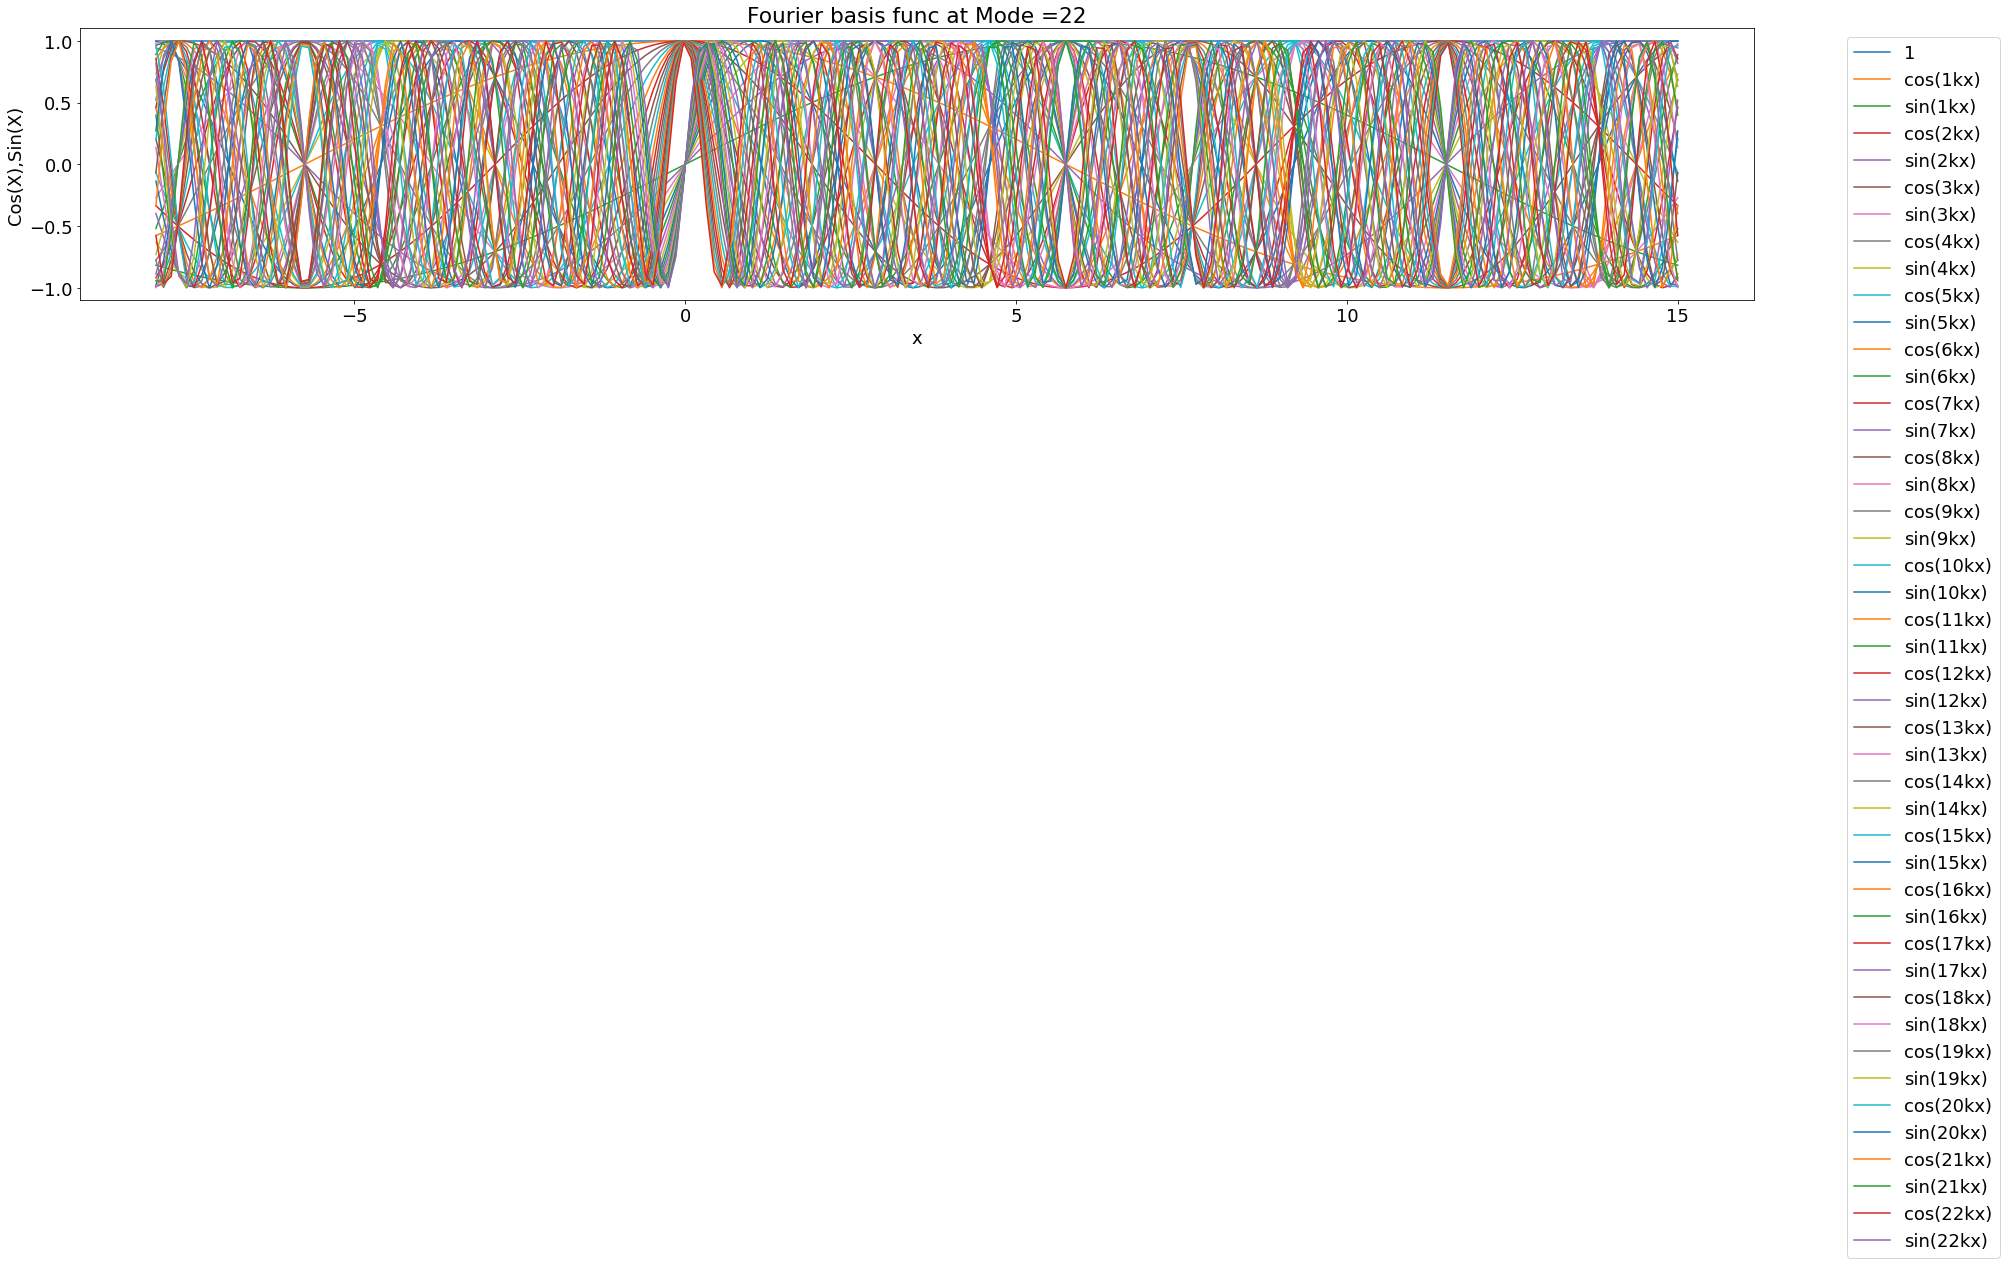

In [13]:
'''Build the basis function evaluation matrix and target function vector at the collocation points'''
A=FourierBasis(x_tilde_pts)
Plot_fourierbasis(A,x_tilde_pts)

# print(len(x_tilde_pts))
# print(len(x_tilde_pts_new))

In [14]:
'''Compute optimal coefficient vector'''
rank = np.linalg.matrix_rank(A)

if A.shape[0] > A.shape[1]:
    print('A is overdetermined.')
elif A.shape[0] < A.shape[1]:
    print('A is underdetermined.')  
else:
    print('A is determined.')

if np.linalg.matrix_rank(A) == min(A.shape):
    print('A is full rank.')
else:
    print('A is rank deficient.')

##########################################################################################

f_tilde_vec = np.array(y_new)

if np.linalg.matrix_rank(A) == min(A.shape):
    print('A is full rank; solve for least squares.')
    c_tilde_star_vec = solve(A.transpose()@A, A.transpose()@f_tilde_vec)
else:
    print('A is rank deficient; solve for shortest least squares')
    c_tilde_star_vec = universal_solve(A.transpose()@A, A.transpose()@f_tilde_vec,
                                       pivot_tol=1e-6)
    
print('')
print('c_tilde_star_vec:\n')
for j,c in enumerate(c_tilde_star_vec):
    if j == 0:
        print('a_%2i = %10.3e'%(j,c))
    elif j%2 == 0:
        k = j/2
        print('b_%2i = %10.3e'%(k,c))
    else:
        k = (j+1)/2
        print('a_%2i = %10.3e'%(k,c))
        
print('')        
print('||r^*||_2 = %10.3e'%(np.linalg.norm(A@c_tilde_star_vec-f_tilde_vec)))

# print(len(x_tilde_pts))
# print(len(x_tilde_pts_new))

A is overdetermined.
A is full rank.
A is full rank; solve for least squares.

c_tilde_star_vec:

a_ 0 =  3.389e+00
a_ 1 = -7.255e+00
b_ 1 = -3.733e-01
a_ 2 =  4.601e+00
b_ 2 =  5.211e+00
a_ 3 =  8.483e-01
b_ 3 =  3.266e+00
a_ 4 = -3.441e+00
b_ 4 =  3.160e+00
a_ 5 = -4.803e+00
b_ 5 = -4.863e+00
a_ 6 =  1.728e+00
b_ 6 = -4.632e+00
a_ 7 =  6.129e+00
b_ 7 =  3.400e+00
a_ 8 =  1.319e+00
b_ 8 =  2.897e+00
a_ 9 = -2.944e+00
b_ 9 =  2.174e+00
a_10 = -2.136e+00
b_10 =  2.541e+00
a_11 = -1.766e+00
b_11 = -3.837e-01
a_12 = -1.536e+00
b_12 = -1.334e+00
a_13 = -8.744e-01
b_13 = -1.766e+00
a_14 =  9.028e-01
b_14 = -7.850e-01
a_15 = -1.775e-01
b_15 =  7.554e-01
a_16 = -7.161e-01
b_16 = -4.402e-01
a_17 = -1.508e-01
b_17 = -1.921e+00
a_18 =  1.431e+00
b_18 = -6.127e-01
a_19 =  9.516e-01
b_19 =  1.776e+00
a_20 = -4.434e-01
b_20 =  8.239e-01
a_21 = -5.983e-01
b_21 = -1.847e-01
a_22 = -1.203e+00
b_22 = -2.956e-01

||r^*||_2 =  5.206e+01


In [15]:
'''Build the best approximant function'''
points_n = max(2*m, 200)

x_tilde_pts_new = np.linspace(x_min, x_max, points_n)
bestg_vec_1 = bestg_vec_func(x_tilde_pts_new)


# print(len(x_tilde_pts))
# print(len(x_tilde_pts_new))

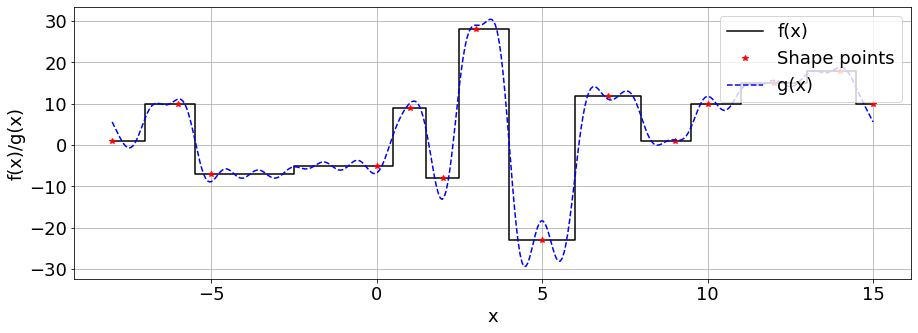

In [16]:
'''Plot comparison of f and g_best_vec'''


f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.step(shape_pts[:,0], shape_pts[:,1], where='mid',label='f(x)', color='k')
plt.plot(shape_pts[:,0], shape_pts[:,1], '*', color='red',label='Shape points')
plt.grid()
plt.plot(x_tilde_pts_new,bestg_vec_1,'--',label='g(x)', color='b')
plt.legend( loc='upper right')
plt.xlabel('x')
plt.ylabel("f(x)/g(x)")
plt.show()

# print(len(x_tilde_pts))
# print(len(x_tilde_pts_new))

In [17]:
'''L2 norm error'''


g2_integral, error = quad(g2_integrand, x_min, x_max, limit=1000)
print('||g||_L2 =', math.sqrt(g2_integral))
print('quadrature error =', error, '\n')



f_minus_g_2_integral, error = quad(f_minus_g_2_integrand, x_min, x_max, limit=1000)
print('||f-g||_L2 =', math.sqrt(f_minus_g_2_integral))
print('quadrature error =', error)
r_err=(math.sqrt(f_minus_g_2_integral)/np.sqrt(f_integral)*100)
print('\n')
print('Relative error = %10.6f'%r_err[0],'%')

# print(len(x_tilde_pts))
# print(len(x_tilde_pts_new))

||g||_L2 = 62.45049535987834
quadrature error = 8.200272109792905e-06 

||f-g||_L2 = 18.357817428198327
quadrature error = 4.121444646898453e-06


Relative error =  28.402909 %


Positives at collocation pts =  103
Negatives at collocation pts =  97
Positives =  310
Negatives =  290


/tmp/ipykernel_171614/2858370551.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_tilde_pts, u(x_tilde_pts)-bestg_vec_func(x_tilde_pts),'bx',label='collocation pts',color='red')


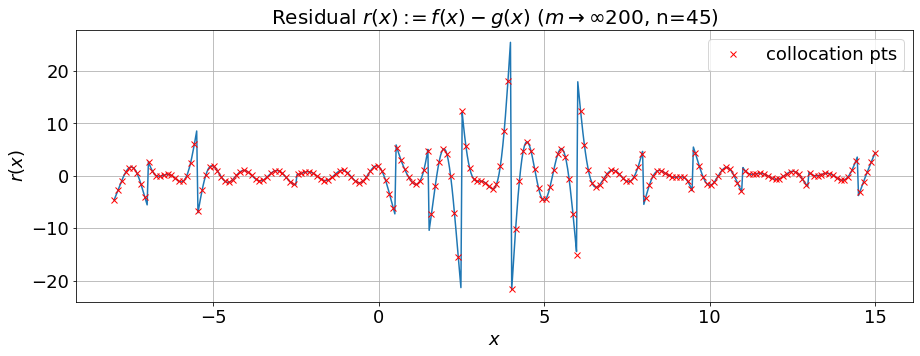

In [18]:
'''Residual of the best approximant'''

points_n = max(3*m, 500)
x_tilde_pts_new = np.linspace(x_min, x_max, points_n)

residual = u(x_tilde_pts_new) - bestg_vec_func(x_tilde_pts_new)
residual_collocation_pts = u(x_tilde_pts) - bestg_vec_func(x_tilde_pts)
print('Positives at collocation pts = ', tuple([True for p in residual_collocation_pts if p>0]).count(True))
print('Negatives at collocation pts = ', tuple([True for p in residual_collocation_pts if p<0]).count(True))
print('Positives = ', tuple([True for p in residual if p>0]).count(True))
print('Negatives = ', tuple([True for p in residual if p<0]).count(True))
  
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(x_tilde_pts_new, residual)
plt.plot(x_tilde_pts, u(x_tilde_pts)-bestg_vec_func(x_tilde_pts),'bx',label='collocation pts',color='red')
plt.title(r'Residual $r(x) :\!\!= f(x) - g(x)$ ($m\rightarrow\infty$'+str(m)+', n='+str(len(A[0]))+')', fontsize=20)

plt.ylabel(r'$r(x)$')
plt.xlabel(r'$x$')

plt.legend(loc='best')
plt.grid(True)
plt.show()

# print(len(x_tilde_pts))
# print(len(x_tilde_pts_new))

In [19]:
print(len(x_tilde_pts))
print(len(x_tilde_pts_new))

200
600


In [20]:
print(points_n)

600
